### Internet Speed Test

Based on
- https://github.com/sivel/
- https://github.com/sivel/speedtest-cli
- https://github.com/sivel/speedtest-cli/blob/master/speedtest.py


In [1]:
import sys, os
import datetime
import logging
import matplotlib.pyplot as plt
from matplotlib import dates, rcParams
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def read_data():
    df = pd.io.parsers.read_csv(
        'speedtest.log',
        names='date time ping download upload'.split(),
        header=None,
        sep=r'\s+',
        parse_dates={'timestamp':[0,1]},
        na_values=['TEST','FAILED'])
    for col in 'ping download upload'.split():
        df[col] = df[col].fillna(0.0)
    # print(df)
    # records every 10 min, or 6/hr, or 6*24=144/day
    Nrows = 5*144  # 5 days = 720 rows
    return df[-Nrows:].copy() # return dots for last Nrows only

In [3]:
def make_plot(plt, df, row_index=1, nhours=2):
    # ---------------------------------
    # select last "nhours" of data
    index_max = df.index[-1]
    dtmax = df.loc[index_max,'timestamp']
    dtmin = dtmax - datetime.timedelta(hours=nhours)

    mask = df['timestamp'] > dtmin
    df = df.loc[mask,:].copy()
    df.index = range(len(df))
    # ---------------------------------
    # create array of horizontal times
    start = df.loc[0,'timestamp']
    end   = df.loc[df.index[-1],'timestamp']
    delta = (end-start)/11.0
    arr_ts = [start]
    for ii in range(12):
        val = arr_ts[-1]      # last element
        arr_ts += [val+delta] # add shifted by delta
    # ---------------------------------
    # plot on 1st or 3rd row of subplot
    # subplot(nrows, ncols, row_index, **kwargs)
    plt.subplot(3, 1, row_index)
    plt.plot(df['timestamp'],df['download'], 'b-')
    # ---------------------------------
    plt.title('Internet Speed (Download in Mbps)')
    plt.ylabel('Bandwidth in MBps')
    y_range = 1.2*df.download.max()
    plt.ylim(0.0,y_range)
    plt.xlabel('Date/Time')
    plt.xticks(rotation='45', ha='right')
    # ---------------------------------
    ax = plt.gca()    # get current Axes
    fg = plt.gcf()    # get current fugure
    # ---------------------------------
    # set horizontal time ticks
    ax.xaxis.set_ticks(arr_ts)
    h_fmt = dates.DateFormatter('%m/%d %H:%M')
    ax.xaxis.set_major_formatter(h_fmt)
    # ---------------------------------
    ax.xaxis.set_tick_params(labelsize=9)
    ax.yaxis.set_tick_params(labelsize=9)

    fg.subplots_adjust(bottom=.25)
    plt.grid();

In [4]:
df = read_data()
df2 = df[-10:]
df2.index = range(len(df2))
N1 = len(df2)
N_add = 720-N1

# need to prepend some zero values at 10-min intervals
# take last available timestamp
t_last = df2.at[0,'timestamp']
print(t_last)

2021-04-14 07:33:00


In [5]:
arr = []
for ii in range(10):
    t_last = t_last - datetime.timedelta(minutes=10)
    arr += [t_last]
arr = arr[::-1]
arr2 = [0.0]*len(arr)
df3 = pd.DataFrame(data = {
    "timestamp":arr, "ping":arr2,
    "download":arr2, "upload":arr2},
    columns = ["timestamp","ping","download","upload"])
df4 = df3.append(df2, ignore_index=True)
display(df4)

,timestamp,ping,download,upload
0,2021-04-14 05:53:00,0.0,0.0,0.0
1,2021-04-14 06:03:00,0.0,0.0,0.0
2,2021-04-14 06:13:00,0.0,0.0,0.0
3,2021-04-14 06:23:00,0.0,0.0,0.0
4,2021-04-14 06:33:00,0.0,0.0,0.0
5,2021-04-14 06:43:00,0.0,0.0,0.0
6,2021-04-14 06:53:00,0.0,0.0,0.0
7,2021-04-14 07:03:00,0.0,0.0,0.0
8,2021-04-14 07:13:00,0.0,0.0,0.0
9,2021-04-14 07:23:00,0.0,0.0,0.0


In [6]:
# df2.dtypes
# datetime64

In [7]:
df = read_data()
print(f"length={len(df)}")
display(df.head())
display(df.tail())

length=720


,timestamp,ping,download,upload
1280,2021-04-13 12:04:00,0.0,0.0,0.0
1281,2021-04-13 12:05:00,0.0,0.0,0.0
1282,2021-04-13 12:06:00,0.0,0.0,0.0
1283,2021-04-13 12:07:00,0.0,0.0,0.0
1284,2021-04-13 12:08:00,0.0,0.0,0.0


,timestamp,ping,download,upload
1995,2021-04-14 07:37:00,21.1,47.0,31.2
1996,2021-04-14 07:38:00,23.2,63.5,31.3
1997,2021-04-14 07:39:00,19.4,68.8,32.4
1998,2021-04-14 07:40:00,18.7,67.5,33.5
1999,2021-04-14 07:41:00,19.2,65.9,31.7


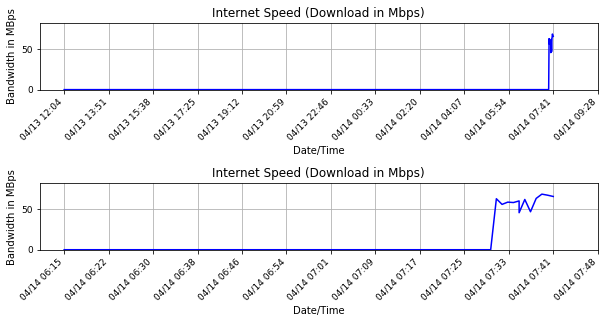

In [8]:
w = 10  # width
h = 5   # height
rcParams['figure.figsize'] = w, h
plt.gcf().clear()   # get current matplotlib figure - and clear
make_plot(plt, df.copy(), row_index=1, nhours=10*24)
make_plot(plt, df.copy(), row_index=3, nhours=2   )
plt.show()